# **Human activity recognition**######

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab/test.csv')

In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()
x_train=train.drop(['subject','Activity'],axis=1)
y_train=train.Activity


In [ ]:
x_test=test.drop(['subject','Activity'],axis=1)
y_test=test.Activity

In [ ]:
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [ ]:
import plotly.express as px
fig=px.bar(train,x="subject",y="Activity",color="Activity")
fig.show()


In [ ]:

fig=px.bar(test,x="subject",y="Activity",color="Activity")
fig.show()


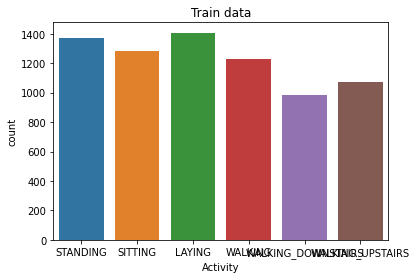

In [ ]:
import seaborn as sns
sns.countplot(x='Activity',data=train)
plt.title("Train data")
plt.show()

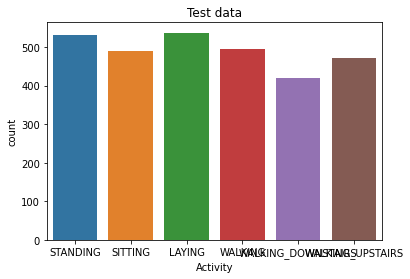

In [ ]:
sns.countplot(x='Activity',data=test)
plt.title("Test data")
plt.show()

In [ ]:
from sklearn import tree
dtr=tree.DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)
y_prediction=dtr.predict(x_test)
dtr.score(x_test,y_test)


0.9243440797060729

[Text(139.18326752221125, 211.4, 'X[381] <= -0.978\nmse = 2.858\nsamples = 7352\nvalue = 2.315'),
 Text(59.38045409674235, 199.32, 'X[52] <= 0.096\nmse = 0.686\nsamples = 4069\nvalue = 0.994'),
 Text(57.6177690029615, 187.24, 'mse = 0.0\nsamples = 1406\nvalue = 0.0'),
 Text(61.1431391905232, 187.24, 'X[559] <= 0.14\nmse = 0.252\nsamples = 2663\nvalue = 1.518'),
 Text(22.36406712734452, 175.16, 'X[57] <= -1.0\nmse = 0.117\nsamples = 1357\nvalue = 1.136'),
 Text(7.050740375123396, 163.07999999999998, 'X[51] <= 0.06\nmse = 0.227\nsamples = 95\nvalue = 1.653'),
 Text(3.525370187561698, 151.0, 'X[244] <= -0.829\nmse = 0.022\nsamples = 44\nvalue = 1.977'),
 Text(1.762685093780849, 138.92000000000002, 'mse = 0.0\nsamples = 43\nvalue = 2.0'),
 Text(5.2880552813425465, 138.92000000000002, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(10.576110562685093, 151.0, 'X[169] <= -0.983\nmse = 0.234\nsamples = 51\nvalue = 1.373'),
 Text(8.813425468904244, 138.92000000000002, 'X[107] <= 0.411\nmse = 0.05

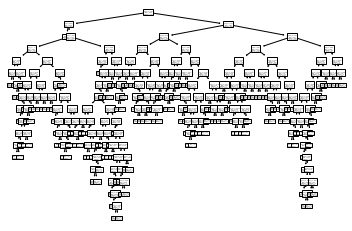

In [ ]:
tree.plot_tree(dtr) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(10,weights='distance',n_jobs=-2,p=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred.shape)
#model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
x=mean_squared_error(y_test,y_pred,sample_weight=None, multioutput='uniform_average')
y=mean_absolute_error(y_test,y_pred,sample_weight=None, multioutput='uniform_average')
print(x,y)

(2947,)
Accuracy: 0.9175432643366135
0.13640990838140482 0.0990838140481846


In [ ]:
accu=[]
rms=[]
mae=[]
subjects=test['subject'].values
for i in range(1,32):
  knn=KNeighborsClassifier(i,weights='distance',leaf_size=30,n_jobs=-2,p=1,metric_params=None)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  #print(y_pred.shape)
  #model accuracy, how often is the classifier correct?
  print("k Accuracy:", i,metrics.accuracy_score(y_test,y_pred))
  print(i)
  x=mean_squared_error(y_test,y_pred,sample_weight=None, multioutput='uniform_average')
  y=mean_absolute_error(y_test,y_pred,sample_weight=None, multioutput='uniform_average')
  mae.append(y)
  rms.append(x)
  accu.append(metrics.accuracy_score(y_test,y_pred))


k Accuracy: 1 0.8887003732609433
1
k Accuracy: 2 0.8887003732609433
2
k Accuracy: 3 0.9049881235154394
3
k Accuracy: 4 0.9060061079063454
4
k Accuracy: 5 0.9134713267729895
5
k Accuracy: 6 0.9134713267729895
6
k Accuracy: 7 0.9127926705123854
7
k Accuracy: 8 0.9155072955548015
8
k Accuracy: 9 0.9168646080760094
9
k Accuracy: 10 0.9175432643366135
10
k Accuracy: 11 0.9212758737699356
11
k Accuracy: 12 0.9199185612487275
12
k Accuracy: 13 0.9195792331184255
13
k Accuracy: 14 0.9172039362063115
14
k Accuracy: 15 0.9178825924669155
15
k Accuracy: 16 0.9189005768578216
16
k Accuracy: 17 0.9202578893790295
17
k Accuracy: 18 0.9229725144214456
18
k Accuracy: 19 0.9212758737699356
19
k Accuracy: 20 0.9222938581608415
20
k Accuracy: 21 0.9219545300305395
21
k Accuracy: 22 0.9219545300305395
22
k Accuracy: 23 0.9216152019002375
23
k Accuracy: 24 0.9219545300305395
24
k Accuracy: 25 0.9195792331184255
25
k Accuracy: 26 0.9216152019002375
26
k Accuracy: 27 0.9199185612487275
27
k Accuracy: 28 0.92

In [ ]:
a=accu
b=[i for i in range(1,32)]
print(a,b)

[0.8887003732609433, 0.8887003732609433, 0.9049881235154394, 0.9060061079063454, 0.9134713267729895, 0.9134713267729895, 0.9127926705123854, 0.9155072955548015, 0.9168646080760094, 0.9175432643366135, 0.9212758737699356, 0.9199185612487275, 0.9195792331184255, 0.9172039362063115, 0.9178825924669155, 0.9189005768578216, 0.9202578893790295, 0.9229725144214456, 0.9212758737699356, 0.9222938581608415, 0.9219545300305395, 0.9219545300305395, 0.9216152019002375, 0.9219545300305395, 0.9195792331184255, 0.9216152019002375, 0.9199185612487275, 0.9202578893790295, 0.9178825924669155, 0.9182219205972175, 0.9165252799457075] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


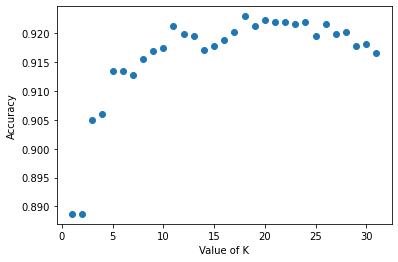

In [ ]:
plt.scatter(b,a)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

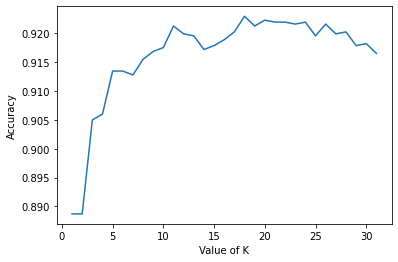

In [ ]:
plt.plot(b,a)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(rms)

[0.167288768238887, 0.167288768238887, 0.14489311163895488, 0.14489311163895488, 0.13539192399049882, 0.13437393959959282, 0.1340346114692908, 0.1333559552086868, 0.1350525958601968, 0.13640990838140482, 0.1326772989480828, 0.1319986426874788, 0.1333559552086868, 0.1367492365117068, 0.1350525958601968, 0.1309806582965728, 0.13064133016627077, 0.12385476756023074, 0.12758737699355277, 0.12453342382083475, 0.12589073634204276, 0.12283678316932474, 0.12317611129962674, 0.12080081438751272, 0.12623006447234475, 0.12012215812690873, 0.12487275195113674, 0.12249745503902273, 0.12690872073294876, 0.12555140821174077, 0.12724804886325075]


In [ ]:
print(mae)

[0.12928401764506278, 0.12928401764506278, 0.11096029860875467, 0.11028164234815066, 0.1021377672209026, 0.10179843909060061, 0.1021377672209026, 0.1001017984390906, 0.0990838140481846, 0.0990838140481846, 0.09535120461486257, 0.09602986087546658, 0.09670851713607058, 0.09942314217848659, 0.09840515778758059, 0.09636918900576857, 0.09535120461486257, 0.09127926705123855, 0.09365456396335256, 0.09195792331184255, 0.09263657957244656, 0.09161859518154054, 0.09195792331184255, 0.09093993892093655, 0.09433322022395657, 0.09093993892093655, 0.09365456396335256, 0.09263657957244656, 0.09569053274516458, 0.09501187648456057, 0.09670851713607058]


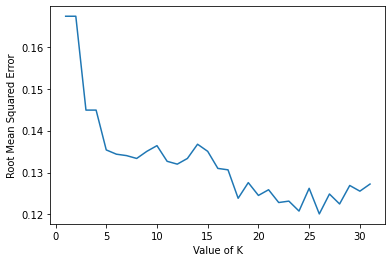

In [ ]:
plt.plot(b,rms)
plt.xlabel("Value of K")
plt.ylabel("Root Mean Squared Error")
plt.show()

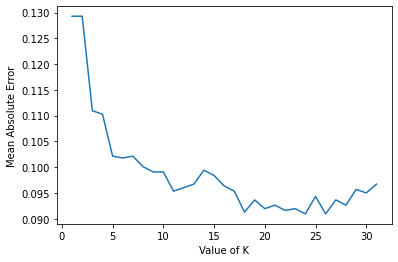

In [ ]:
plt.plot(b,mae)
plt.xlabel("Value of K")
plt.ylabel("Mean Absolute Error")
plt.show()